## Análise Quantitativa: Portfolio

Utilizaremos a Teoria da Fronteira Eficiente de Markowitz, juntamente com o índice de Sharpe, sobre uma carteira de ações, com os dados coletados pelo _Yahoo Finance_, de modo a analisar os retornos e volatilidades de cada ativo e da carteira num geral, e as correlações presentes. Tais indicadores nos permitirão duas otimizações: obter **i)** a carteira de menor risco; e **ii)** a carteira de maior índice de Sharpe (retorno / risco).

A teoria de Markowitz considera diferentes distribuições de peso para cada ativo numa carteira, obtidas pseudoaleatoriamente, e para cada uma dessas distribuições calcula-se o retorno médio e a variância média da carteira. Naturalmente, algumas combinações serão melhores do que as outras, onde, por melhores, nos referimos ao seu índice de Sharpe ser mais elevado. Esse índice, dado pelo retorno_médio / variância_média da carteira, nos informa sobre seu rendimento por unidade de risco; quanto maior este índice, melhor é o desempenho da carteira, pois o rendimento compensa o risco do investidor.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime

## Ações

Analisaremos os ativos:

1. BBAS3
2. FLRY3
3. GFSA3
4. ITSA4
5. PETR4
6. POMO4
7. PTBL3
8. TEND3
9. VALE3

durante o período 01/01/2015 até 23/02/2021.

In [2]:
start = datetime(2015, 1, 1)
end = datetime(2021, 2, 23)
acoes = ['BBAS3.SA', 'FLRY3.SA', 'GFSA3.SA', 'ITSA4.SA', 'PETR4.SA', 'POMO4.SA', 'PTBL3.SA', 'TEND3.SA',
        'VALE3.SA']

dados = wb.get_data_yahoo(acoes, start, end)['Adj Close']
dados.describe()

Symbols,BBAS3.SA,FLRY3.SA,GFSA3.SA,ITSA4.SA,PETR4.SA,POMO4.SA,PTBL3.SA,TEND3.SA,VALE3.SA
count,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000
mean,28.318742,18.986753,11.456460,8.260690,17.063391,2.910618,3.693198,13.411785,35.545653
std,10.964158,7.610102,4.866924,2.725907,7.188878,0.745468,1.473030,9.750712,18.841895
min,10.023708,5.483137,2.530046,3.786946,3.896351,1.379504,1.456051,4.682553,7.356939
25%,18.235943,12.441479,6.480000,5.639266,11.661221,2.345156,2.406933,4.682553,16.872835
50%,27.395538,20.651054,11.438251,8.299367,15.508850,2.880000,3.708595,9.727839,37.232700
75%,35.495544,25.220243,15.819280,10.652216,23.623228,3.501229,4.709924,21.868347,48.092003
max,50.934219,32.534382,21.307602,13.786363,31.120001,5.351583,10.670000,38.953609,102.320000


## Retornos Anuais
Pelo método 'pct_change()' podemos observar a variação percentual entre cada sucessão de linhas, nos fornecendo a variação diária entre o preço de fechamento. Ao analisarmos a média diária e multiplicarmos pelo número de dias de negociação, que estamos considerando como 250, obtemos o retorno anual do ativo. Aplicando este raciocínio para o dataframe ficamos com os retornos anuais de todos os ativos e, portanto, da carteira.

Text(0, 0.5, 'Retorno Anual')

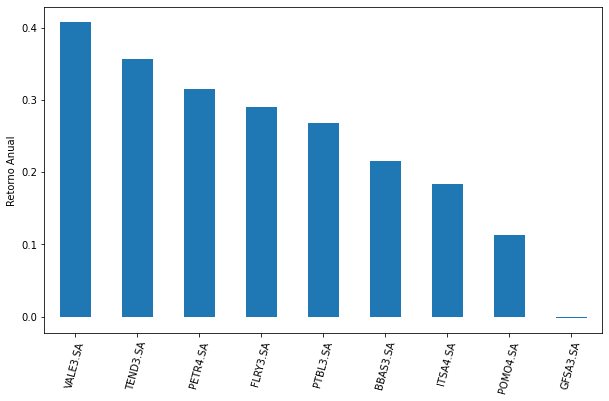

In [3]:
# retornos diários e anuais

dias_negoc = 250

d_returns = dados.pct_change()
a_returns = d_returns.mean() * dias_negoc

a_returns.sort_values(ascending=False).plot(kind = 'bar', figsize = (10, 6))
plt.xlabel(None)
plt.xticks(rotation=75)
plt.ylabel('Retorno Anual')

## Correlações

Essa grandeza nos relata sobre a influência que a variação de uma variável exerce sobre a outra, assumindo valores entre -1 até +1. O primeiro caso refere-se a uma influência negativa: as variações andam em sentidos opostos, caso uma seja positiva, a outra será negativa, e vice-versa. Já para o segundo, as variações andam no mesmo sentido.

Além de exibirmos o _heatmap_ do portfólio, mostramos um histograma das médias das correlações por ativo para analisarmos quais são os mais correlacionados, em média.

Text(80.52000000000001, 0.5, '')

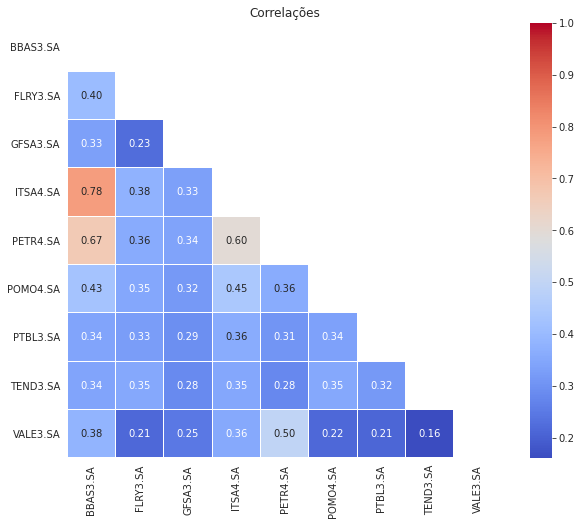

In [4]:
correlations = d_returns.corr()

# como desejamos limpar um pouco o heatmap, mostraremos somente a metade inferior
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style('white'):
    f, ax = plt.subplots(figsize = (10, 8))
    ax = sns.heatmap(correlations, mask = mask, annot = True, 
                     cmap = 'coolwarm', fmt = '.2f', linewidths = 0.05, 
                     vmax = 1.0, square = True, linecolor = 'white')

plt.title('Correlações')
plt.xlabel(None)
plt.ylabel(None)

Text(0, 0.5, 'Média')

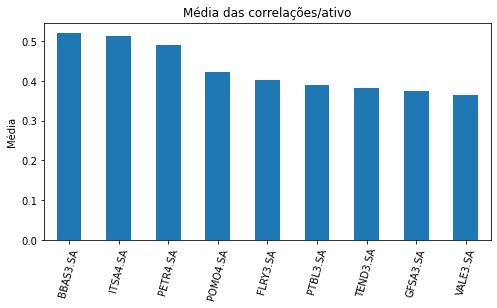

In [5]:
medias = [(col, correlations[col].mean()) for col in correlations]

medias = pd.Series(data = {media[0]: media[1] for media in medias})
medias.sort_values(ascending = False).plot(kind = 'bar', 
                                           title = 'Média das correlações/ativo', 
                                           figsize = (8, 4))
plt.xticks(rotation=75)
plt.ylabel('Média')

É possível observar que:
1. **BBAS3**, **ITSA4** e **PETR4** estão altamente correlacionados entre si e são os que apresentam maior correlação entre toda a carteira;
2. **VALE3** é o ativo mais diversificado, sendo mais correlacionado com **PETR4** em 50% e possuindo uma média de correlação abaixo de 40%;
3. A não ser pelos ativos do item 1, podemos dizer que a carteira é diversificada, o que nos leva à recomendação de adquirir mais ativos de outros setores.

## Otimização da Carteira
Aqui consideraremos diversas combinações entre os ativos de modo a obtermos seus respectivos retornos e variações. Destacaremos a carteira de menor volatilidade (que apresenta o menor risco, isto é, mais segura) e a de maior retorno por unidade de risco (carteira otimizada).

In [6]:
# listas para armazenarmos as quantidades de interesse, como retorno, peso, variação e indíce de Sharpe

cart_returns = []
peso_acoes = []
cart_vols = []
sharpe = []

# estabelecendo o número de ativos e o número de carteiras a serem geradas, neste caso 100.000
n_acoes = len(acoes)
n_carts = 100000

# loop para a geração de várias combinações; utilizaremos a matriz de covariância para nos auxiliar no 
# cálculo da variância

a_cov = d_returns.cov() * dias_negoc
for _ in range(n_carts):
    peso = np.random.random(n_acoes)            # gerando n_acoes valores aleatórios
    peso /= np.sum(peso)                        # normalizando-os
    
    ret = np.dot(peso, a_returns)               # retorno da carteira baseado na dist. de pesos
    var = np.dot(peso.T, np.dot(a_cov, peso))   # variância da carteira
    vol = np.sqrt(var)                          # volatilidade da carteira
    
    s = ret / vol                               # índice de Sharpe
    
    cart_returns.append(ret)
    peso_acoes.append(peso)
    cart_vols.append(vol)
    sharpe.append(s)

Determinando as carteiras desejadas

In [7]:
carteira = {'Retorno': cart_returns, 'Volatilidade': cart_vols, 'Índice de Sharpe': sharpe}

for k, acao in enumerate(acoes):
    carteira[acao] = [Peso[k] for Peso in peso_acoes]

data = pd.DataFrame(carteira)
colunas = ['Retorno', 'Volatilidade', 'Índice de Sharpe'] + [acao for acao in acoes]
data = data[colunas]

# carteiras de mínima volatilidade e maior índice de Sharpe
menor_vol = data['Volatilidade'].min()
maior_sharpe = data['Índice de Sharpe'].max()

carteira_menor_vol = data.loc[data['Volatilidade'] == menor_vol]
carteira_maior_sharpe = data.loc[data['Índice de Sharpe'] == maior_sharpe]

### Fronteira Eficiente
Se colocarmos as carteiras geradas acima num plot de Volatilidade x Retorno, e utilizarmos uma escala de cor para fazermos referência ao índice de Sharpe de cada carteira, notamos que os pontos em verde determinam a **fronteira eficiente** do portfolio em consideração. Destacamos, também, as carteiras otimizadas:
1. Carteira de <span style="color: blue;">mínima volatilidade (mais segura);</span>
2. Carteira de <span style="color: red;">maior índice de Sharpe (a melhor carteira possível).</span>

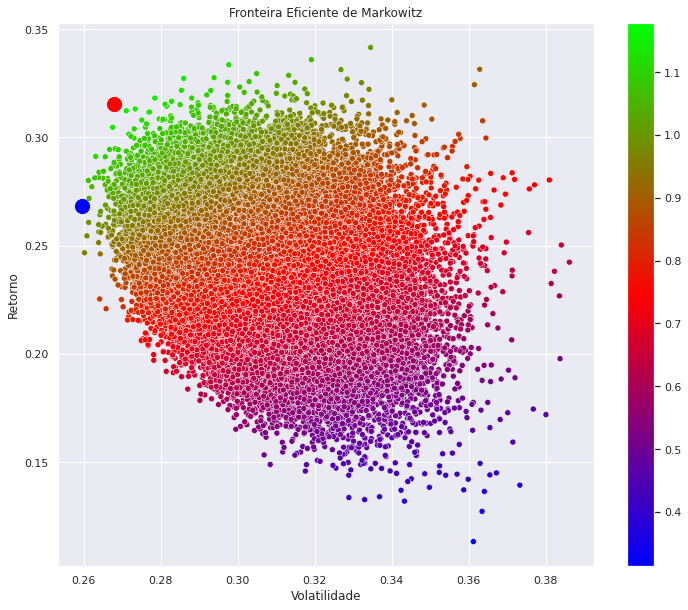

In [8]:
sns.set()

plt.figure(figsize = (12, 10))
cor = 'brg'
ax = sns.scatterplot(x = 'Volatilidade', y = 'Retorno', hue = 'Índice de Sharpe', data = data, 
                    palette = cor)

norm = plt.Normalize(data['Índice de Sharpe'].min(), data['Índice de Sharpe'].max())
sm = plt.cm.ScalarMappable(cmap = cor, norm = norm)
sm.set_array([])

ax.get_legend().remove()
ax.figure.colorbar(sm)

plt.scatter(x = carteira_maior_sharpe['Volatilidade'], y = carteira_maior_sharpe['Retorno'], c = 'red',
           marker = 'o', s = 200)
plt.scatter(x = carteira_menor_vol['Volatilidade'], y = carteira_menor_vol['Retorno'], c = 'blue',
           marker = 'o', s = 200)

plt.title('Fronteira Eficiente de Markowitz')
plt.show()

## Carteiras Otimizadas
1. Primeiro iremos ajustá-las para serem exibidas em porcentagem. Nota-se, porém, que a coluna referente ao índice de Sharpe não deve ser alterada.
2. Portanto, multiplicaremos todas, menos esta, por 100, com a função df_mult();
3. Realizaremos a exibição com o auxílio da função inc_pct(), que incluirá '%' no nome das colunas.

In [86]:
def df_mult(df, n = 1, coluna_jump = None):
    """Esta função multiplica as colunas de dataframe por n. 
    Caso desejar pular uma coluna, informá-las em forma de 
    iterável em 'coluna_jump'. Por padrão, n = 1.
    
    Return: dataframe"""
    
    data = df.copy()
    
    for col in data:
        if col != coluna_jump:
            data.loc[:, col] *= n

    return data


def inc_pct(df):
    """Esta função recebe um dataframe e atualiza os nomes 
    de suas colunas com %. A única coluna que não sofrerá 
    alteração é 'Índice de Sharpe'.
    
    Return: dataframe"""
    
    colunas = [col for col in df if col != 'Índice de Sharpe']
    col_renomeadas = [f'{col} %' for col in colunas]
    
    return df.rename(columns = {par[0]: par[1] for par in zip(colunas, col_renomeadas)})

In [10]:
carteira_menor_vol = df_mult(carteira_menor_vol, n = 100, 
                            coluna_jump = 'Índice de Sharpe')

carteira_maior_sharpe = df_mult(carteira_maior_sharpe, n = 100, 
                            coluna_jump = 'Índice de Sharpe')

In [85]:
print(f'Carteira de Menor Volatlidade:\n'
      f'{inc_pct(carteira_menor_vol).T}\n')

print(f'Carteira de Maior Índice de Sharpe:\n'
      f'{inc_pct(carteira_maior_sharpe).T}')

Carteira de Menor Volatlidade:
                      50698
Retorno %         26.815646
Volatilidade %    25.967753
Índice de Sharpe   1.032652
BBAS3.SA %         0.549629
FLRY3.SA %        23.299824
GFSA3.SA %         5.247257
ITSA4.SA %        22.382086
PETR4.SA %         0.880734
POMO4.SA %         4.307309
PTBL3.SA %        10.764746
TEND3.SA %        21.160212
VALE3.SA %        11.408203

Carteira de Maior Índice de Sharpe:
                      13294
Retorno %         31.562583
Volatilidade %    26.778564
Índice de Sharpe   1.178651
BBAS3.SA %         3.772800
FLRY3.SA %        28.217529
GFSA3.SA %         0.333006
ITSA4.SA %        12.365220
PETR4.SA %         0.405406
POMO4.SA %         1.610535
PTBL3.SA %         3.095183
TEND3.SA %        26.012768
VALE3.SA %        24.187553


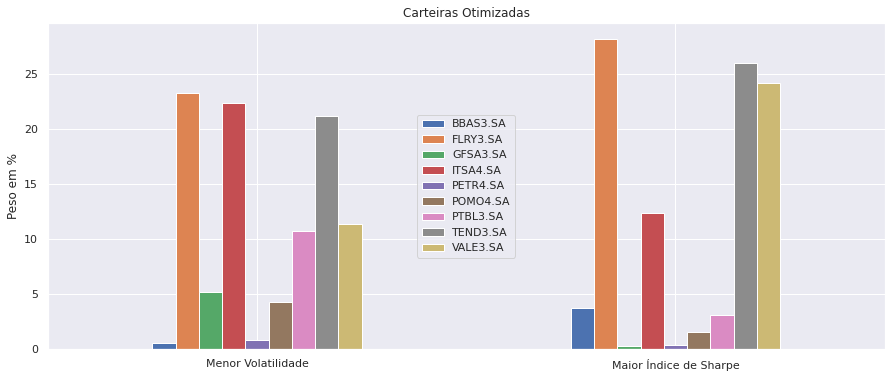

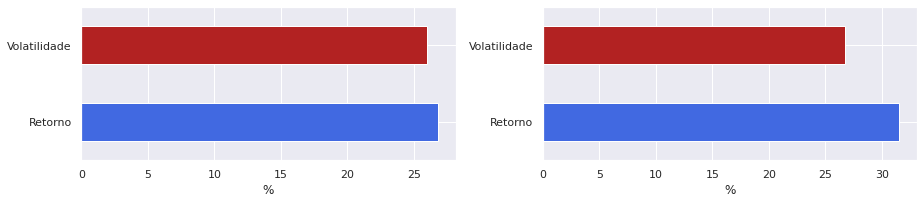

In [71]:
dfs = (carteira_menor_vol, carteira_maior_sharpe)
c = 'Índice de Sharpe'
colunas = ['Retorno', 'Volatilidade']

carteiras = pd.concat(dfs).rename(index = {carteiras.index[0]: 'Menor Volatilidade', 
                                           carteiras.index[1]: 'Maior Índice de Sharpe'}).drop(c, axis = 1)

carteiras.loc[:, acoes].plot(kind = 'bar', figsize = (15, 6), 
                             title = 'Carteiras Otimizadas', 
                             ylabel = 'Peso em %', 
                             rot = 0)
plt.legend(loc = 'center')

plt.figure(figsize = (13, 3))
plt.subplot(1, 2, 1)
carteiras.loc['Menor Volatilidade', colunas].plot(kind = 'barh', 
                                                  color = ['royalblue', 'firebrick'])
plt.xlabel('%')


plt.subplot(1, 2, 2)
carteiras.loc['Maior Índice de Sharpe', colunas].plot(kind = 'barh', 
                                                     color = ['royalblue', 'firebrick'])
plt.xlabel('%')

plt.tight_layout()
plt.show()

## Conclusões
- Os ativos **FLRY3**, **ITSA4**, **VALE3** e **TEND3** apresentam os maiores pesos em ambas otimizações, nos sugerindo que são os melhores ativos da carteira, assim merecendo um investimento maior;
- Como há correlações altas, em média, é de se considerar aportes em novos ativos de setores diferentes para obter uma diversificação maior;
- Os ativos **BBAS3** e **PETR4** não apresentam um papel significante na carteira (< 5%);
- A carteira apresenta um índice de retorno levemente maior que o de volatilidade em ambas otimizações, assim limitando a taxa retorno / risco; provavelmente devido à alta média de correlações;
- É válida a análise para um intervalo de tempo distinto para averiguarmos a resiliência dos resultados apresentados aqui.